In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline


In [27]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt', header=None)

In [28]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [29]:
df.columns = col_names

In [30]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [31]:
df.drop('Id', axis=1, inplace=True)

In [32]:
df.shape

(699, 10)

In [33]:
df.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,object
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


In [34]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [35]:
# check the NaN and remove the entire row
df.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,16
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0
Class,0


In [36]:
df1 = df.dropna()

In [37]:
# view frequency distribution of values in `Class` variable
df1['Class'].value_counts()


,count
Class,
2,444
4,239


In [38]:
X = df1.drop(['Class'], axis=1)
y = df1['Class']


In [40]:
df1['Class'].value_counts()

,count
Class,
2,444
4,239


In [41]:
X.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [42]:
# Import the train_test_split and split the train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

In [43]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape


((478, 9), (205, 9))

In [44]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


In [45]:
# initiate the model
knn = KNeighborsClassifier(n_neighbors=3)


In [46]:
# fit the model to the training set
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [47]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))


Training set score: 0.9833
Test set score: 0.9805


In [48]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           2       0.98      0.98      0.98       131
           4       0.97      0.97      0.97        74

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



Write a code to find the accuracy with k value of [3,5,7,9,11,15,17,21,25] and plot the accuracy with k values. (x-axis is k value and y-axis is accuracy).

In [49]:
ls = [3,5,7,9,11,15,17,21,25]
res = []
for k in ls:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test,y_test)
    print('Test set score: {:.4f}'.format(acc))
    res.append(acc)

Test set score: 0.9805
Test set score: 0.9805
Test set score: 0.9805
Test set score: 0.9756
Test set score: 0.9707
Test set score: 0.9756
Test set score: 0.9756
Test set score: 0.9707
Test set score: 0.9707


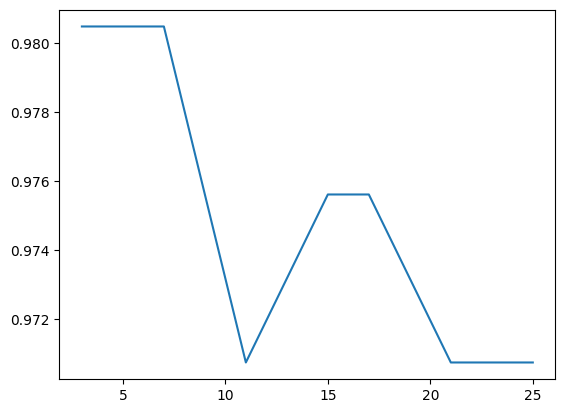

In [51]:
plt.plot(ls, res)

TASK 2


In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [52]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=3)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=3)

In [53]:

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))


Training set score: 0.9686
Test set score: 0.9659


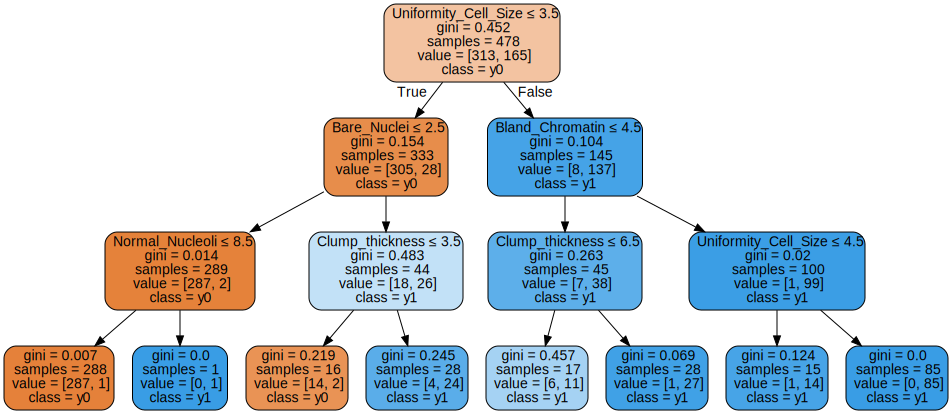

In [54]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=X_train.columns, class_names=True, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [60]:
y_pred_gini = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred_gini))


              precision    recall  f1-score   support

           2       0.98      0.96      0.97       131
           4       0.94      0.97      0.95        74

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205



In [64]:
ls = [3,4,5,6,7,8,9]
res = []
for k in ls:
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=k, random_state=5)
    clf_gini.fit(X_train, y_train)
    acc = clf_gini.score(X_test,y_test)
    print('Test set score: {:.4f}'.format(acc))
    res.append(acc)

Test set score: 0.9659
Test set score: 0.9561
Test set score: 0.9610
Test set score: 0.9707
Test set score: 0.9659
Test set score: 0.9561
Test set score: 0.9561


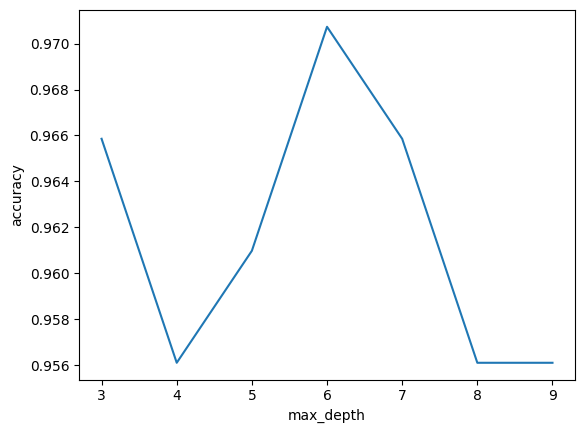

In [63]:
plt.plot(ls, res)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [65]:
#use entropy
ls = [3,4,5,6,7,8,9]
res = []
for k in ls:
    clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=k, random_state=5)
    clf_gini.fit(X_train, y_train)
    acc = clf_gini.score(X_test,y_test)
    print('Test set score: {:.4f}'.format(acc))
    res.append(acc)

Test set score: 0.9659
Test set score: 0.9756
Test set score: 0.9707
Test set score: 0.9707
Test set score: 0.9659
Test set score: 0.9659
Test set score: 0.9659


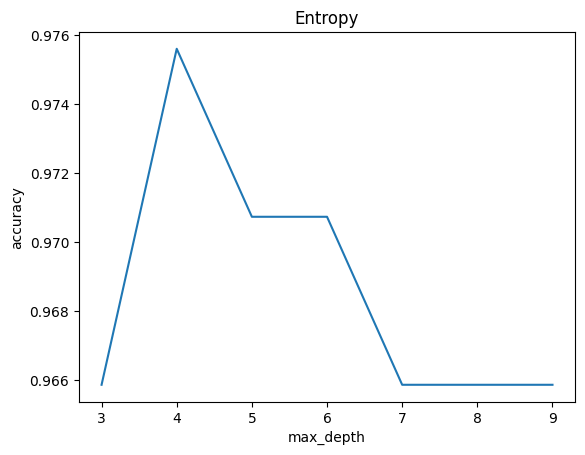

In [66]:
plt.plot(ls, res)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Entropy")
plt.show()

Task 3

In [67]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier


In [68]:
#Create a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

In [70]:
#fit the model
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       131
           4       0.97      0.97      0.97        74

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [72]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)


Uniformity_Cell_Size           0.262315
Uniformity_Cell_Shape          0.224361
Bare_Nuclei                    0.191424
Single_Epithelial_Cell_Size    0.088087
Normal_Nucleoli                0.087323
Bland_Chromatin                0.064529
Clump_thickness                0.050007
Marginal_Adhesion              0.022183
Mitoses                        0.009771
dtype: float64


<ipython-input-73-e34ca99d8875>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


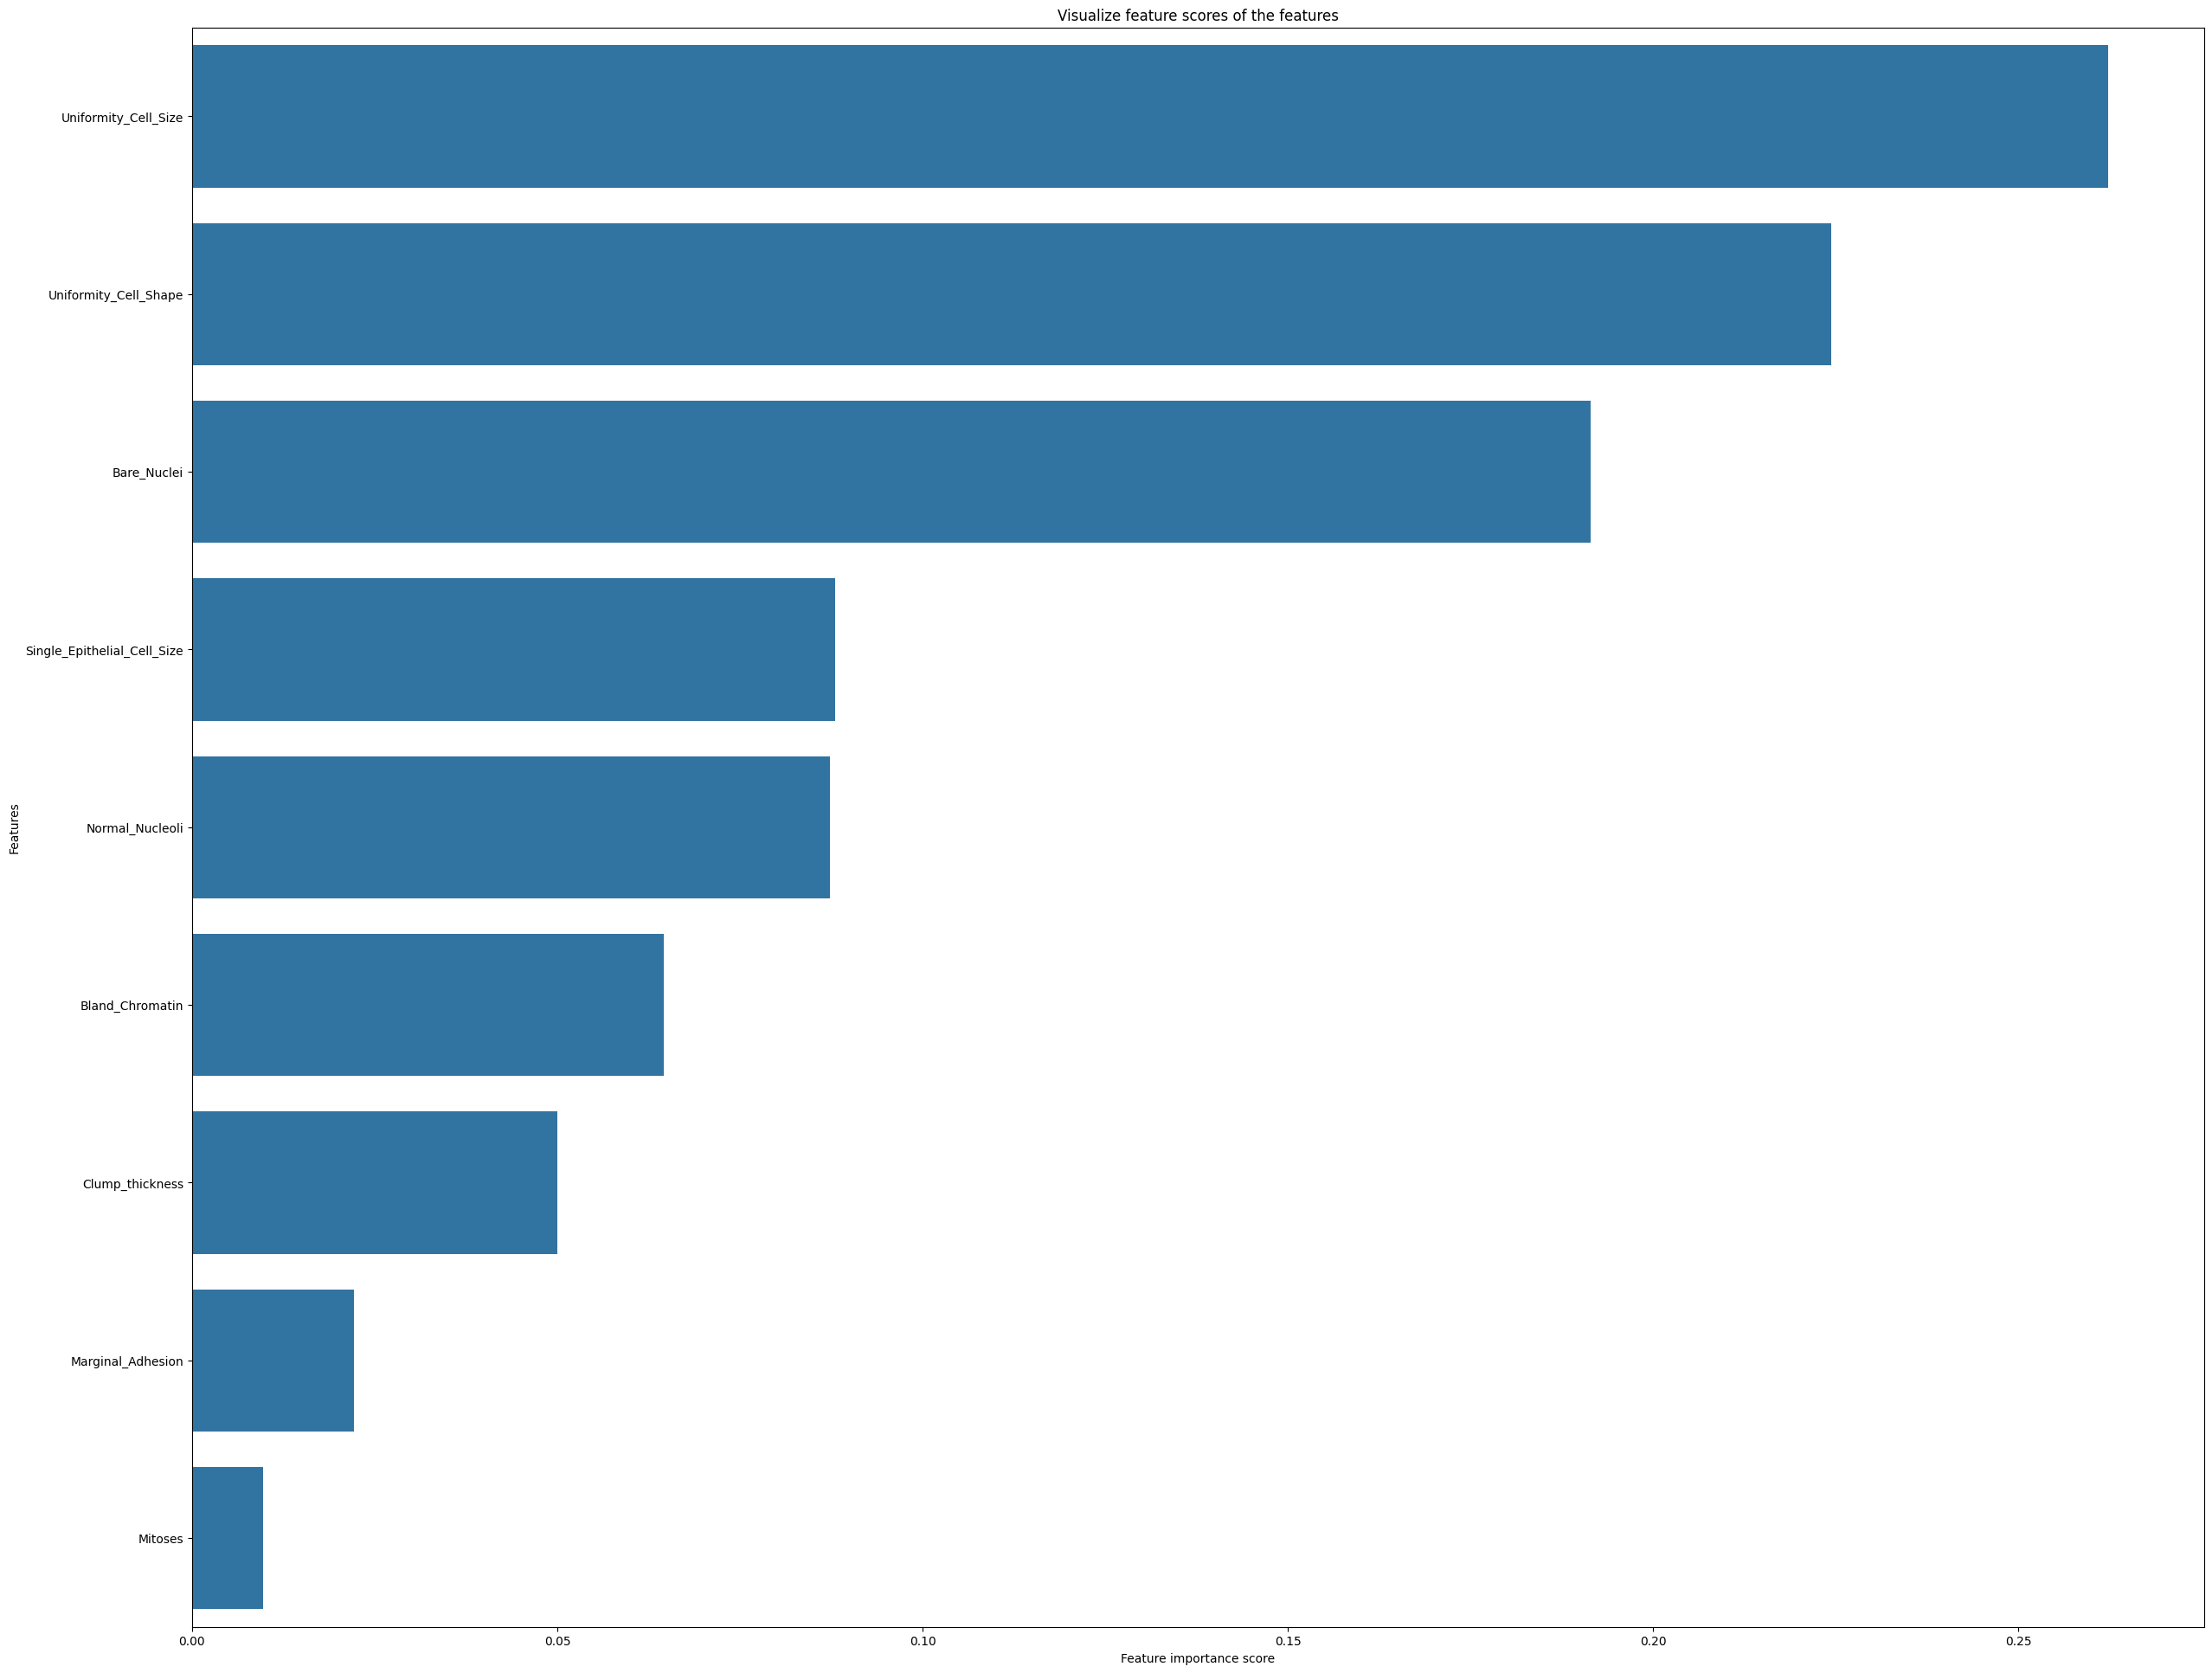

In [73]:
# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()
